In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

from astropy import constants as const
import astropy.units as u
from astropy.units import cds
cds.enable()

from scipy import interpolate

## 1. Planck Function as a Function of Wavelength

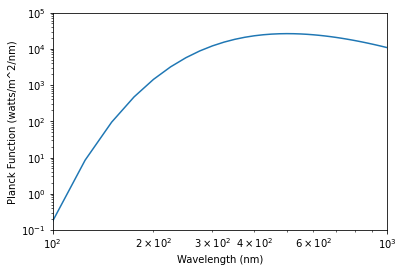

In [2]:
rangelambda = np.linspace(10**2, 10**3, 37) * u.nm

c1 = 2.0 * const.h * const.c**2
c2 = const.h * const.c / const.k_B
T = 5770.0 * u.K


def Planck(rangelambda, T):
    B = (c1 / rangelambda**5) * (np.exp(c2/T/rangelambda)-1.0)**-1.0
    return B.to(u.joule / u.s / u.m**2 / u.nm)


fig, ax = plt.subplots(1,1)

ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Planck Function (watts/m^2/nm)')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(10**2, 10**3)
ax.set_ylim(10**-1, 10**5)

ax.plot(rangelambda, Planck(rangelambda,T))

plt.show()

## 2. Reading in a Model for the Atmosphere of a Star Similar to the Sun

In [4]:
data = np.genfromtxt('https://github.com/evansj2014/Astro1Projects/blob/cb4e5e308432001461fb69af9c6d10342634bb1b/Data_Files/06000g40.krz', skip_header=13, delimiter=',')

amass = data[:,0] # column mass density in g/cm^2
Temp = data[:,1] # Temperature in K

fig, ax = plt.subplots(1,1)

ax.scatter(amass, Temp)
x = np.array([2,3,4,5,6])

func = interpolate.interp1d(amass, Temp)

ax.scatter(x, func(x), c='red')

func = interpolate.interp1d(amass, Temp*2)

ax.scatter(x, func(x), c='red')

ax.set_xlabel('Column Mass Density (g/cm^2)')
ax.set_ylabel('Temperature (K)')
ax.set_xlim(-2,10)
ax.set_ylim(2000,16000)

plt.show()

ValueError: ignored

## 3. Predicted Limb Darkening

In [ ]:
print('Wavelength, I_I0, tau, mu, kappa')
mu = 0.5

wavelength = 300
I_I0 = 0.475
tau = -np.log(I_I0)
kappa = tau/mu
print(wavelength, I_I0, tau, mu, kappa)

wavelength = 400
I_I0 = 0.58
tau = -np.log(I_I0)
kappa = tau/mu
print(wavelength, I_I0, tau, mu, kappa)

wavelength = 500
I_I0 = 0.68
tau = -np.log(I_I0)
kappa = tau/mu
print(wavelength, I_I0, tau, mu, kappa)